In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.stats import randint, uniform

In [2]:
df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Sky's the Limit\BAN6025Project2Data.csv")
df.head()

,Target_Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
df = pd.get_dummies(df, columns=['X8', 'X18', 'X15', 'X25', 'X27'], drop_first=True, dtype=float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Target_Y       1000000 non-null  int64  
 1   X1             1000000 non-null  float64
 2   X2             1000000 non-null  float64
 3   X3             1000000 non-null  int64  
 4   X4             1000000 non-null  int64  
 5   X5             1000000 non-null  int64  
 6   X6             1000000 non-null  float64
 7   X7             1000000 non-null  float64
 8   X9             1000000 non-null  int64  
 9   X10            1000000 non-null  float64
 10  X11            1000000 non-null  float64
 11  X12            1000000 non-null  float64
 12  X13            1000000 non-null  int64  
 13  X14            1000000 non-null  int64  
 14  X16            1000000 non-null  int64  
 15  X17            1000000 non-null  int64  
 16  X19            1000000 non-null  int64  
 17  X20      

In [4]:
# Split features and target
X = df.drop(columns=['Target_Y'])
y = df['Target_Y']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)


In [5]:
chosen_columns = ['X5',
 'X28',
 'X23',
 'X27_windows',
 'X22',
 'X19',
 'X2',
 'X1',
 'X8_AC',
 'X18_BC',
 'X18_BB',
 'X18_BE',
 'X18_BD',
 'X29',
 'X17',
 'X3',
 'X16',
 'X15_CB',
 'X21',
 'X24',
 'X14',
 'X7',
 'X9',
 'X27_macintosh',
 'X15_CC',
 'X18_BF',
 'X27_other',
 'X31',
 'X25_TELEAPP',
 'X15_CD',
 'X15_CF',
 'X20',
 'X6',
 'X4',
 'X13',
 'X15_CE',
 'X18_BG',
 'X27_x11']
print(len(chosen_columns))

38


In [6]:
X_selected = X[chosen_columns]  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=69, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=69)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert resampled training data back to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_selected.columns)

In [7]:
dt = DecisionTreeClassifier()

dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

    importance        feature
0     0.186409             X5
3     0.163916    X27_windows
1     0.106369            X28
5     0.089966            X19
33    0.060682             X4
7     0.053828             X1
14    0.035544            X17
2     0.032632            X23
27    0.027744            X31
4     0.025049            X22
34    0.023136            X13
6     0.020192             X2
10    0.019976         X18_BB
9     0.018426         X18_BC
20    0.018251            X14
32    0.016092             X6
16    0.015386            X16
21    0.014426             X7
22    0.013693             X9
18    0.013159            X21
11    0.012260         X18_BE
8     0.006207          X8_AC
15    0.005455             X3
17    0.004720         X15_CB
31    0.003051            X20
13    0.002995            X29
26    0.002722      X27_other
23    0.002107  X27_macintosh
12    0.001750         X18_BD
19    0.001240            X24
24    0.000851         X15_CC
37    0.000625        X27_x11
30    0.00

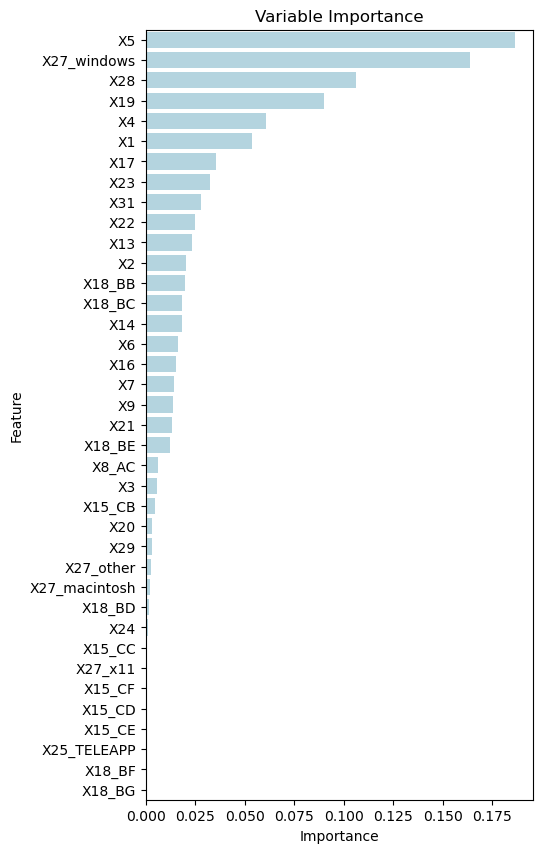

In [9]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X_selected.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()